## Required Libraries Importation

In [1]:
import pandas as ps
import numpy as ny
import matplotlib.pyplot as mt # for the visualization purpose
import seaborn as sea # for the visualization purpose

## loading waste dataset

In [2]:
waste_data = ps.read_csv('northern-ireland-local-authority-collected-municipal-waste-management-statistics-time-series-1.csv')

In [3]:
waste_data.head() # This will show the top 5 rows of the datset

,QuarterCode,QuarterName,FinancialYear,AreaCode,AreaName,WasteManagementGroup,DataStatus,"Local authority collected municipal waste arisings (tonnes), KPI(j)",Local authority collected municipal waste preparing for reuse (tonnes),Local authority collected municipal waste dry recycling (tonnes),...,"Household waste preparing for reuse, dry recycling and composting rate (%), KPI(a2)",Household waste landfilled (tonnes),"Household waste landfill rate (%), KPI(b)",Number of households,"Household waste arisings per household (kilogrammes per household), KPI(h)",Population,"Household waste arisings per capita (kilogrammes per capita), KPI(p)",Waste from households recycling (including preparing for reuse and composting) (tonnes),Waste from households arisings (tonnes),Waste from households recycling rate (including preparing for reuse and composting) (%)
0,Q1,April to June,2006/07,95AA,Antrim,arc21 (pre April 2015),Finalised,"9,885",-,"2,542",...,-,"4,525",52.6,-,-,51059,168,-,-,-
1,Q1,April to June,2006/07,95BB,Ards,arc21 (pre April 2015),Finalised,"13,137",-,"1,231",...,-,"8,998",72.8,-,-,75767,163,-,-,-
2,Q1,April to June,2006/07,95CC,Armagh,SWaMP2008,Finalised,"7,912",-,"1,443",...,-,"4,900",70.0,-,-,56785,123,-,-,-
3,Q1,April to June,2006/07,95DD,Ballymena,arc21 (pre April 2015),Finalised,"10,072",-,"1,466",...,-,"6,525",68.7,-,-,61447,155,-,-,-
4,Q1,April to June,2006/07,95EE,Ballymoney,NWRWMG (pre April 2015),Finalised,"3,772",-,550,...,-,"2,735",83.2,-,-,29392,112,-,-,-


In [4]:
waste_data.shape # This will show the no of rows and columns of the dataset

(1128, 40)

In [5]:
waste_data.dtypes # This will show the data types of the columns

QuarterCode                                                                                                       object
QuarterName                                                                                                       object
FinancialYear                                                                                                     object
AreaCode                                                                                                          object
AreaName                                                                                                          object
WasteManagementGroup                                                                                              object
DataStatus                                                                                                        object
Local authority collected municipal waste arisings (tonnes), KPI(j)                                               object
Local authority collected munici

## Checking Null Values and Cleaning them

In [13]:
waste_data.isnull().sum()

QuarterCode                                                                                                       0
QuarterName                                                                                                       0
FinancialYear                                                                                                     0
AreaCode                                                                                                          0
AreaName                                                                                                          0
WasteManagementGroup                                                                                              0
DataStatus                                                                                                        0
Local authority collected municipal waste arisings (tonnes), KPI(j)                                               0
Local authority collected municipal waste preparing for reuse (tonnes)  

In [14]:
data=waste_data.dropna() # Dropping null values

In [15]:
data.shape # checking shape of the dataset after cleaning

(1068, 40)

In [16]:
waste = data.drop(['QuarterName','FinancialYear','DataStatus'], axis=1) # Dropping unnecessary columns

In [17]:
waste.head()

,QuarterCode,AreaCode,AreaName,WasteManagementGroup,"Local authority collected municipal waste arisings (tonnes), KPI(j)",Local authority collected municipal waste preparing for reuse (tonnes),Local authority collected municipal waste dry recycling (tonnes),Local authority collected municipal waste composting (tonnes),Local authority collected municipal waste dry recycling and composting (tonnes),"Local authority collected municipal waste preparing for reuse, dry recycling and composting (tonnes)",...,"Household waste preparing for reuse, dry recycling and composting rate (%), KPI(a2)",Household waste landfilled (tonnes),"Household waste landfill rate (%), KPI(b)",Number of households,"Household waste arisings per household (kilogrammes per household), KPI(h)",Population,"Household waste arisings per capita (kilogrammes per capita), KPI(p)",Waste from households recycling (including preparing for reuse and composting) (tonnes),Waste from households arisings (tonnes),Waste from households recycling rate (including preparing for reuse and composting) (%)
0,Q1,95AA,Antrim,arc21 (pre April 2015),"9,885",-,"2,542","2,353","4,895",-,...,-,"4,525",52.6,-,-,51059,168,-,-,-
1,Q1,95BB,Ards,arc21 (pre April 2015),"13,137",-,"1,231","2,191","3,422",-,...,-,"8,998",72.8,-,-,75767,163,-,-,-
2,Q1,95CC,Armagh,SWaMP2008,"7,912",-,"1,443","1,116","2,559",-,...,-,"4,900",70.0,-,-,56785,123,-,-,-
3,Q1,95DD,Ballymena,arc21 (pre April 2015),"10,072",-,"1,466","1,511","2,977",-,...,-,"6,525",68.7,-,-,61447,155,-,-,-
4,Q1,95EE,Ballymoney,NWRWMG (pre April 2015),"3,772",-,550,0,550,-,...,-,"2,735",83.2,-,-,29392,112,-,-,-


In [18]:
waste = waste.drop_duplicates() # Dropping duplicates if available
waste.shape # Checking shape after dropping

(1068, 37)

In [19]:
waste.head() # Checking data frame after cleaning

,QuarterCode,AreaCode,AreaName,WasteManagementGroup,"Local authority collected municipal waste arisings (tonnes), KPI(j)",Local authority collected municipal waste preparing for reuse (tonnes),Local authority collected municipal waste dry recycling (tonnes),Local authority collected municipal waste composting (tonnes),Local authority collected municipal waste dry recycling and composting (tonnes),"Local authority collected municipal waste preparing for reuse, dry recycling and composting (tonnes)",...,"Household waste preparing for reuse, dry recycling and composting rate (%), KPI(a2)",Household waste landfilled (tonnes),"Household waste landfill rate (%), KPI(b)",Number of households,"Household waste arisings per household (kilogrammes per household), KPI(h)",Population,"Household waste arisings per capita (kilogrammes per capita), KPI(p)",Waste from households recycling (including preparing for reuse and composting) (tonnes),Waste from households arisings (tonnes),Waste from households recycling rate (including preparing for reuse and composting) (%)
0,Q1,95AA,Antrim,arc21 (pre April 2015),"9,885",-,"2,542","2,353","4,895",-,...,-,"4,525",52.6,-,-,51059,168,-,-,-
1,Q1,95BB,Ards,arc21 (pre April 2015),"13,137",-,"1,231","2,191","3,422",-,...,-,"8,998",72.8,-,-,75767,163,-,-,-
2,Q1,95CC,Armagh,SWaMP2008,"7,912",-,"1,443","1,116","2,559",-,...,-,"4,900",70.0,-,-,56785,123,-,-,-
3,Q1,95DD,Ballymena,arc21 (pre April 2015),"10,072",-,"1,466","1,511","2,977",-,...,-,"6,525",68.7,-,-,61447,155,-,-,-
4,Q1,95EE,Ballymoney,NWRWMG (pre April 2015),"3,772",-,550,0,550,-,...,-,"2,735",83.2,-,-,29392,112,-,-,-


In [18]:
waste.count() # Counting total no of rows

QuarterCode                                                                                                      1068
AreaCode                                                                                                         1068
AreaName                                                                                                         1068
WasteManagementGroup                                                                                             1068
Local authority collected municipal waste arisings (tonnes), KPI(j)                                              1068
Local authority collected municipal waste preparing for reuse (tonnes)                                           1068
Local authority collected municipal waste dry recycling (tonnes)                                                 1068
Local authority collected municipal waste composting (tonnes)                                                    1068
Local authority collected municipal waste dry recycling 

In [42]:
waste.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1068 entries, 0 to 1067
Data columns (total 37 columns):
 #   Column                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                         --------------  -----  
 0   QuarterCode                                                                                                    1068 non-null   object 
 1   AreaCode                                                                                                       1068 non-null   object 
 2   AreaName                                                                                                       1068 non-null   object 
 3   WasteManagementGroup                                                                                           1068 non-null   object 
 4   Local authority collected municipal waste arisin

## Boxplots for understanding outliers

<Axes: xlabel='Population'>

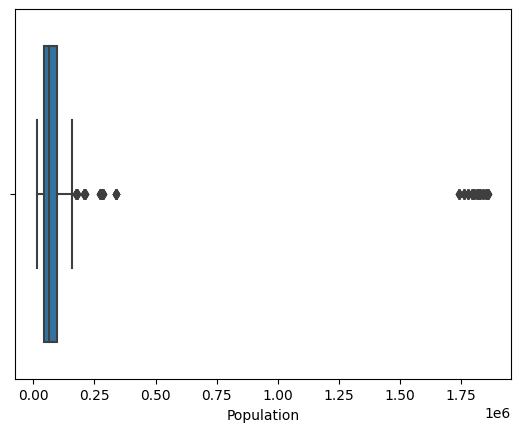

In [20]:
sea.boxplot(x=waste['Population'])

<Axes: xlabel='Local authority collected municipal waste dry recycling and composting rate (%), KPI(e)'>

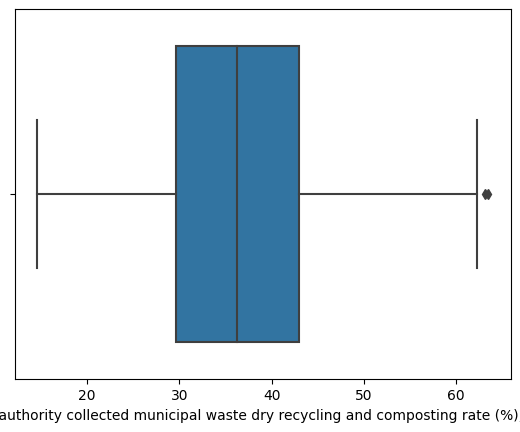

In [21]:
sea.boxplot(x=waste['Local authority collected municipal waste dry recycling and composting rate (%), KPI(e)'])

<Axes: xlabel='Local authority collected municipal waste energy recovery rate (%)'>

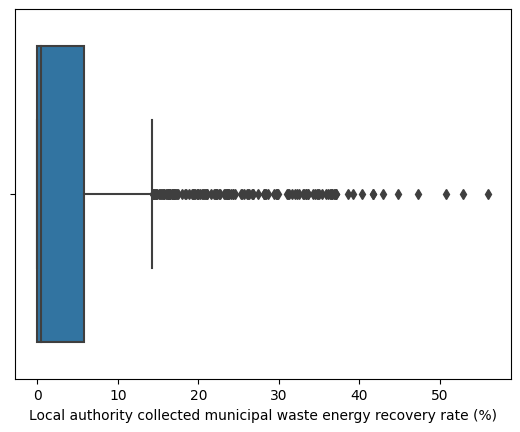

In [22]:
sea.boxplot(x=waste['Local authority collected municipal waste energy recovery rate (%)'])

<Axes: xlabel='Household waste dry recycling and composting rate (%), KPI(a)'>

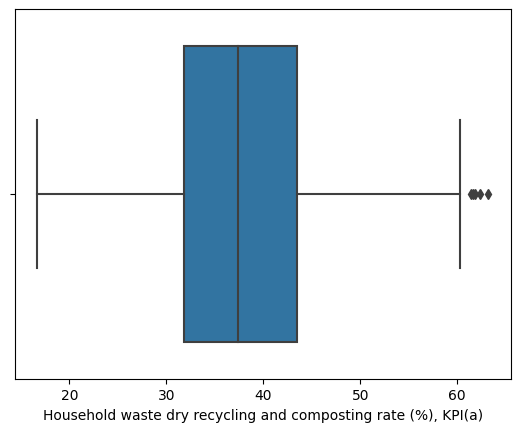

In [23]:
sea.boxplot(x=waste['Household waste dry recycling and composting rate (%), KPI(a)'])

<Axes: xlabel='Household waste arisings per capita (kilogrammes per capita), KPI(p)'>

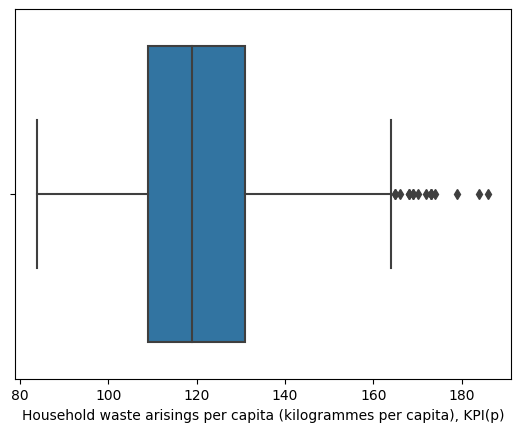

In [24]:
sea.boxplot(x=waste['Household waste arisings per capita (kilogrammes per capita), KPI(p)'])

## Generating Heatmap

<ipython-input-25-fdbe3d6ec9a0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sea.heatmap(waste.corr(), annot = True)


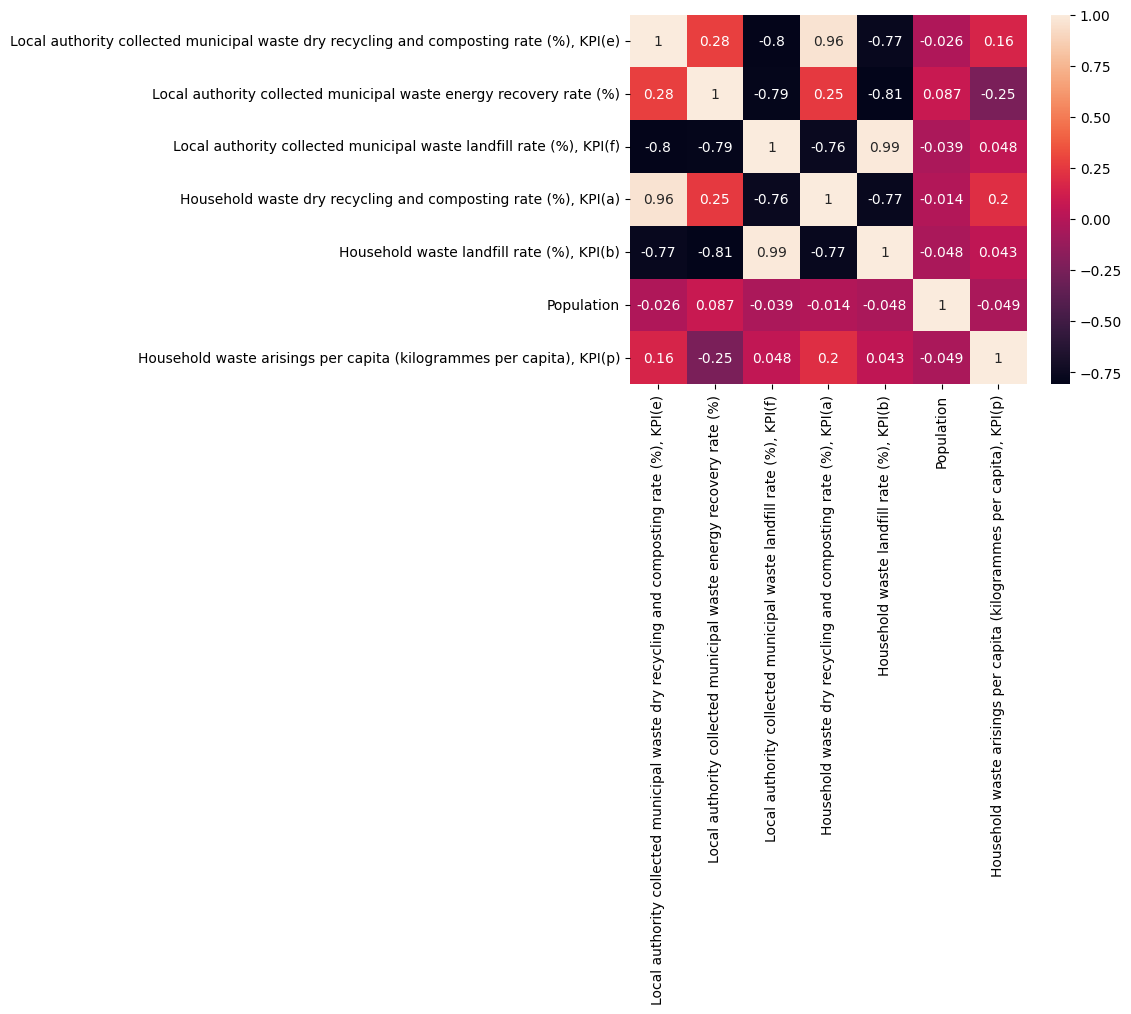

In [25]:
sea.heatmap(waste.corr(), annot = True)
mt.show()

In [26]:
waste.describe().T

,count,mean,std,min,25%,50%,75%,max
"Local authority collected municipal waste dry recycling and composting rate (%), KPI(e)",1068.0,36.663858,9.325199,14.6,29.675,36.25,42.950,63.5
Local authority collected municipal waste energy recovery rate (%),1068.0,5.024906,9.035889,0.0,0.000,0.50,5.725,56.0
"Local authority collected municipal waste landfill rate (%), KPI(f)",1068.0,57.942416,14.799855,4.0,49.775,60.10,68.600,98.6
"Household waste dry recycling and composting rate (%), KPI(a)",1068.0,37.861330,8.340506,16.7,31.800,37.40,43.425,63.2
"Household waste landfill rate (%), KPI(b)",1068.0,56.843258,13.953868,4.2,49.800,59.45,66.725,85.6
Population,1068.0,149093.985019,348906.654831,16532.0,44107.000,62149.00,96869.000,1862137.0
"Household waste arisings per capita (kilogrammes per capita), KPI(p)",1068.0,121.520599,16.673516,84.0,109.000,119.00,131.000,186.0


## Histogram

Text(0.5, 0, 'Population')

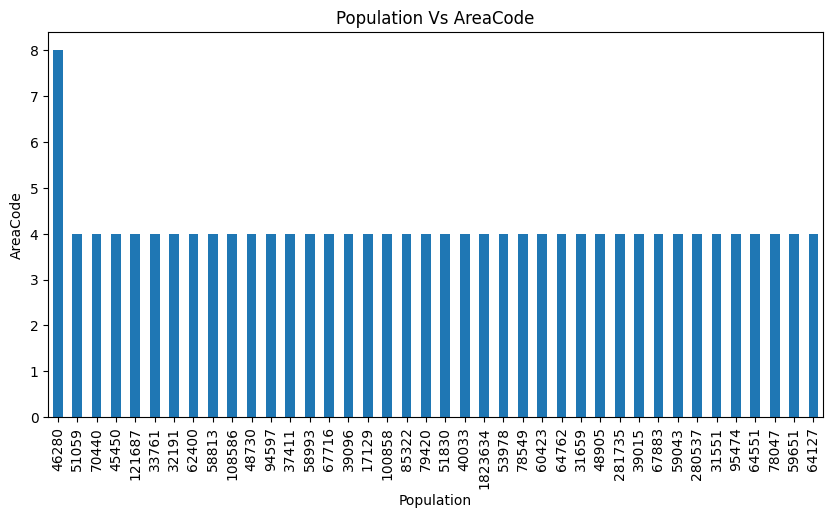

In [33]:
waste.Population.value_counts().nlargest(40).plot(kind='bar',figsize=(10,5))
mt.title("Population Vs AreaCode")
mt.ylabel('AreaCode')
mt.xlabel('Population')

Text(0.5, 0, 'AreaCode')

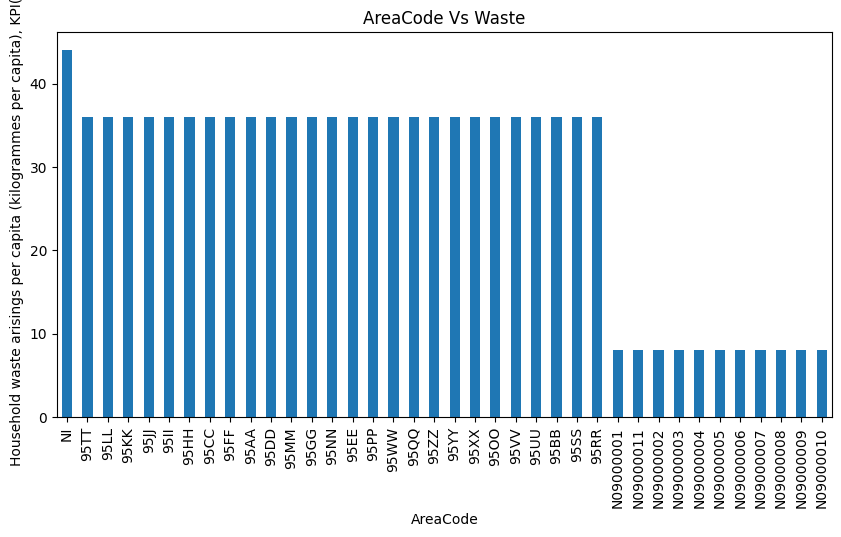

In [31]:
waste.AreaCode.value_counts().nlargest(40).plot(kind='bar',figsize=(10,5))
mt.title("AreaCode Vs Waste")
mt.ylabel('Household waste arisings per capita (kilogrammes per capita), KPI(p)')
mt.xlabel('AreaCode')

## Dividing Dataset for splitting into test and train

In [43]:
A = waste.iloc[:,[10,14,16,26,29,32]].values
B = waste.iloc[:,[33]].values

In [45]:
from sklearn.model_selection import train_test_split
training_a, testing_a, training_b, testing_b = train_test_split(A, B, test_size = 0.20, random_state = 42)

In [46]:
# Checking dimensions
print("training_a shape:", training_a.shape)
print("testing_a shape:", testing_a.shape)
print("training_b shape:", training_b.shape)
print("testing_b shape:", testing_b.shape)

training_a shape: (854, 6)
testing_a shape: (214, 6)
training_b shape: (854, 1)
testing_b shape: (214, 1)


## KNN Model

<ipython-input-48-7637ad7da4f2>:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  acy = ps.Series()
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
<ipython-input-48-7637ad7da4f2>:12: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  acy = acy.append(ps.Series(metrics.accuracy_score(prediction, testing_b)))
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
<ipython-inpu

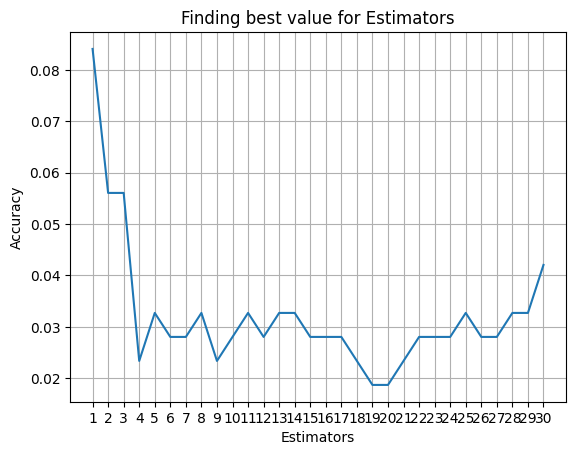

Highest value:  0.08411214953271028


In [48]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

A_axis = list(range(1, 31))
acy = ps.Series()
a = range(1,31)

for i in list(range(1, 31)):
    knn_model = KNeighborsClassifier(n_neighbors = i)
    knn_model.fit(training_a, training_b)
    prediction = knn_model.predict(testing_a)
    acy = acy.append(ps.Series(metrics.accuracy_score(prediction, testing_b)))
mt.plot(A_axis, acy)
mt.xticks(a)
mt.title("Finding best value for Estimators")
mt.xlabel("Estimators")
mt.ylabel("Accuracy")
mt.grid()
mt.show()
print('Highest value: ',acy.values.max())